In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%capture
import sys
sys.path.append('../')

# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

In [3]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
prop_cycle = pl.cycler(color=['#377eb8','#e41a1c','#4daf4a','#984ea3',
                              '#ff7f00','#ffff33','#a65628','#f781bf','#999999'])
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

from plot_utils import *

# definitions of 
filter_pre_1950 = talk_data['date']<'1950-01-01'
filter_1950_2000 = (talk_data['date']<'2000-01-01') & (talk_data['date']>'1950-01-01')
filter_2000_2020 = (talk_data['date']<'2020-01-01') & (talk_data['date']>'2000-01-01')
filter_2020_2023 = (talk_data['date']<'2024-01-01') & (talk_data['date']>'2020-01-01')
filter_apr_2024 = talk_data['date']>'2024-01-01'

talk_data['period'] = 'pre 1950'
talk_data.loc[filter_1950_2000, 'period'] = '1950-1999'
talk_data.loc[filter_2000_2020, 'period'] = '2000-2019'
talk_data.loc[filter_2020_2023, 'period'] = '2020-2023'
talk_data.loc[filter_apr_2024, 'period'] = 'April 2024'

searchdata = {'search': [{"include": "temple"}, {"include": "covenant"}], 'top_user':'false'}

raw_counts = text_search(talk_data, searchdata, group='period', norm='date', quiet=True)
#raw_counts.loc['April 2024'].to_frame()

One of the more notable features of the April 2024 general conference was the frequent reference to covenants and to temples. The 229 total references to "covenant" was an all-time high, by a significant margin. The 188 references to "temple" was second only to the 191 references in April 1999. The chart below provides some historical context.

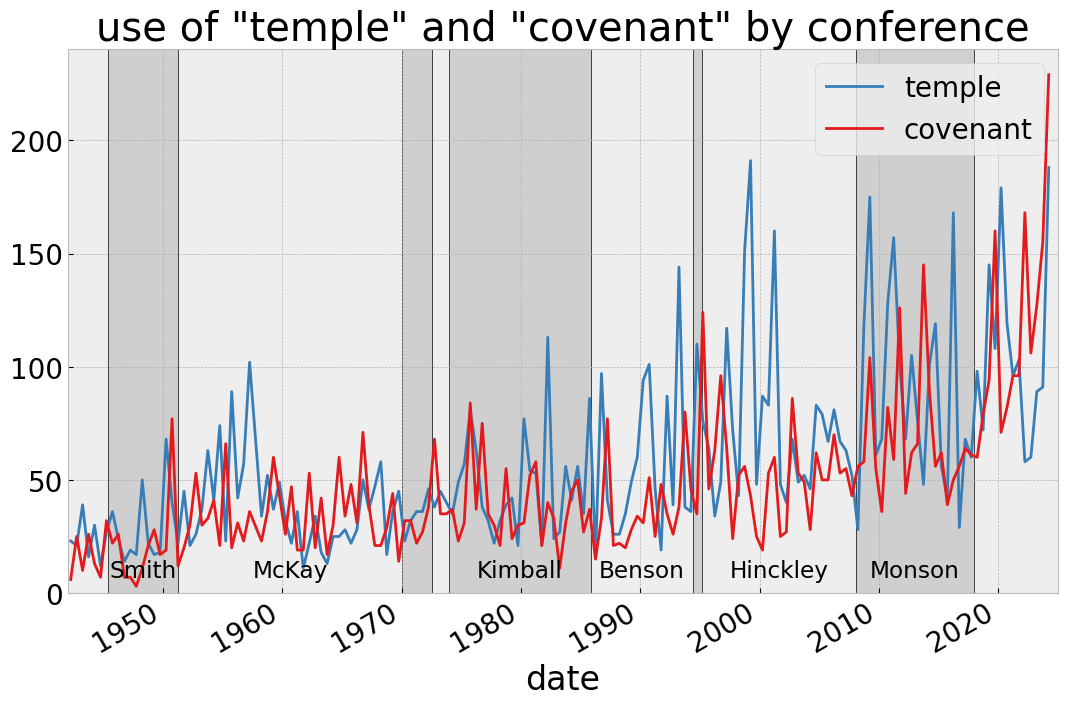

In [4]:
stats_conf = text_search(talk_data, searchdata, group='date', norm='date', quiet=True)

_ = stats_conf.plot(
    title='use of "temple" and "covenant" by conference',
    xlim=['1942-01-01', '2025-01-01'], ylim=[0, None]
)

add_president_terms()
add_president_names(5)

In [5]:
#stats_conf.sort_values('covenant', ascending=False)[:5]

The numbers 223 and 189, for the April 2024 general conference, works out to an average of 7.2 and 5.9 mentions of each term per talk. To put these numbers in context, the table and chart below shows the incidence of both terms (in average uses per talk): 1950 to 1999, 2000 to 2019, and 2020 to 2023.

In [6]:
stats_period_ = text_search(talk_data, searchdata, group='period', norm='talk', quiet=True)
stats_period = stats_period_[stats_period_.index != 'pre 1950']

stats_period.round(1)

,temple,covenant
period,,
1950-1999,1.4,1.1
2000-2019,2.2,1.7
2020-2023,2.8,3.2
April 2024,5.9,7.2


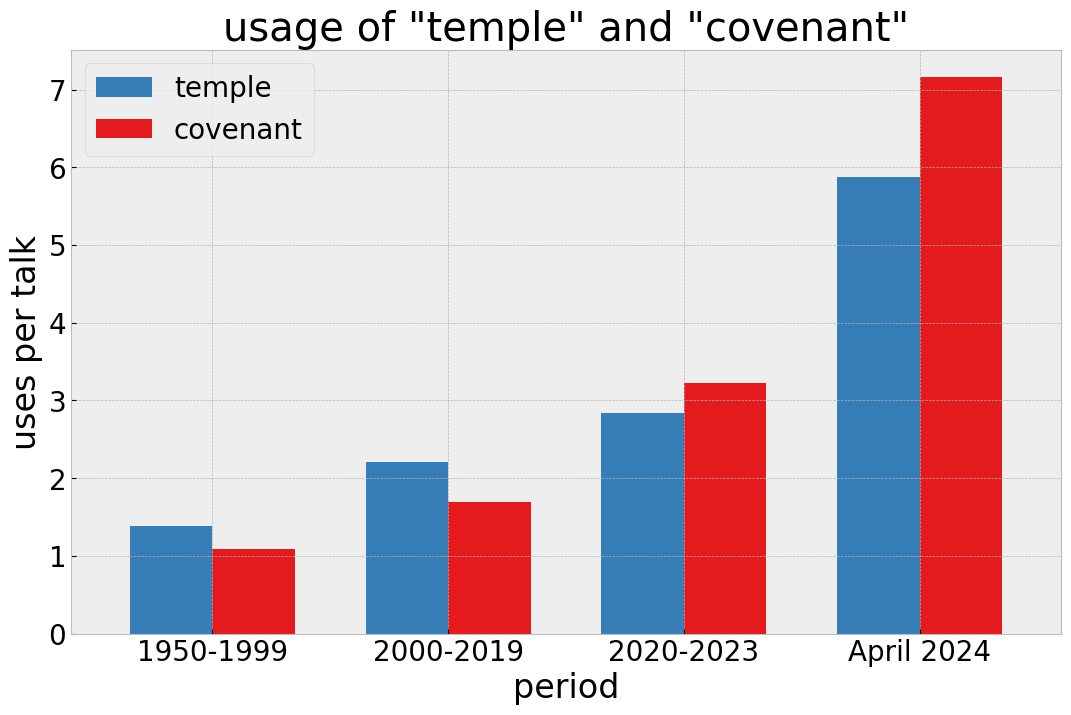

In [7]:
_ = stats_period.plot.bar(rot=0, width=0.7,
                          ylabel='uses per talk',
                          title='usage of "temple" and "covenant"')

Mentions of the word "covenant" per talk in April 2024 represent a nearly 700% increase over the 50-year baseline period from 1950 to 1999, when the word was used on average 1.1 times per talk. Many of the talks during that era will not have used the word at all. In fact, one striking aspect of the April 2024 conference was the high number of talks that made reference to covenants, sometimes briefly in passing, even when the talk was mainly about some other subject. That pattern suggests the possibility that speakers have been specifically encouraged to mention covenants or temples. To test this possibility, the chart below shows the fraction of all talks mentioning the word covenant, by conference, since 1942.

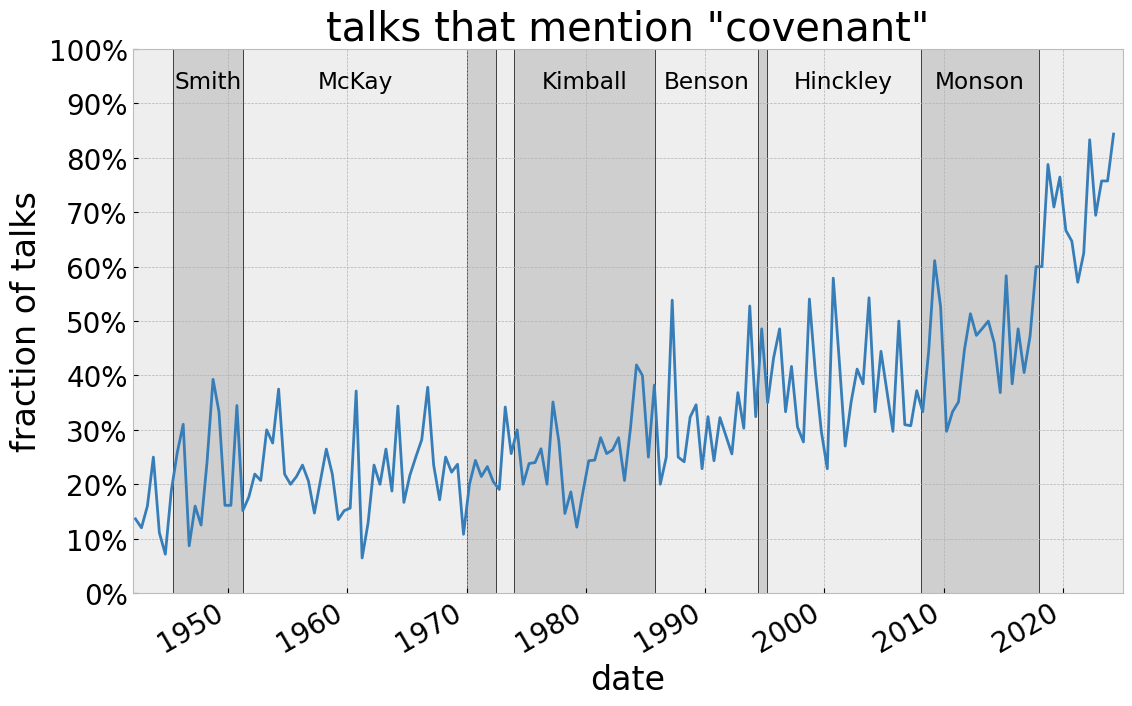

In [8]:
def calc_frac(string, group='date'):
    return talk_data['body'].str.contains(string).groupby(talk_data[group]).mean()

ax = calc_frac('covenant').plot(
    title='talks that mention "covenant"',
    ylim=[0,1], xlim=['1942-01-01', '2025-01-01'],
    ylabel='fraction of talks')

ticks = np.arange(0, 1.1, 0.1)
ax.set_yticks(ticks, [f'{t*100:.0f}%' for t in ticks])
add_president_terms()
add_president_names(0.92)

Once again, April 2024 represents a new high, with around 85% of speakers mentioning covenants. However, more striking in this plot is the apparent step change in frequency that began with the presidency of Russell Nelson in 2018. Prior to 2018, the level was already somewhat higher than it had been in the middle decades of the 20th century, there was a gradual increase over time beginning during the Benson and Hinckley presidencies, but there was a pretty dramatic change under Nelson. The table below shows the fraction of talks mentioning temple or covenant under three church presidents: McKay, Monson, and Nelson.

In [9]:
pres_stats = pd.concat([calc_frac('covenant', 'president').to_frame('covenant'),
                        calc_frac('temple', 'president').to_frame('temple')], axis='columns')

pres_stats.loc[['David O. McKay', 'Thomas S. Monson', 'Russell M. Nelson']].round(2)

,covenant,temple
president,,
David O. McKay,0.22,0.35
Thomas S. Monson,0.45,0.46
Russell M. Nelson,0.71,0.55


Both of the recent numbers are a pretty striking departure from norms under the McKay presidency, but the change brom Monson to Nelson was in fact bigger than the change from Nelson to Monson, 50 years apart. With largely the same pool of speakers as existed 2008-2017, we see that fully 26% of speakers have been mentioning covenants in their talks now who weren't doing so 7 years ago, and an additional 10% of speakers are now mentioning temples. This suggests, similar to a previous analysis of 
[quoting the president of the church](https://qhspencer.github.io/lds-data-analysis/presidents), that there may be some specific guidance behind the scenes regarding this.

In [10]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')